# Neural Networks - Theory 1

# Importing Packages

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

In [2]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from typing import Mapping, List

## Historical Background

In 1943 computational neuro-scientists Warren McCulloch and Walter Pitts (1943) created the first computational model for the behavior of a biological neuron. 
	
The (biological) brain consists of neurons: 

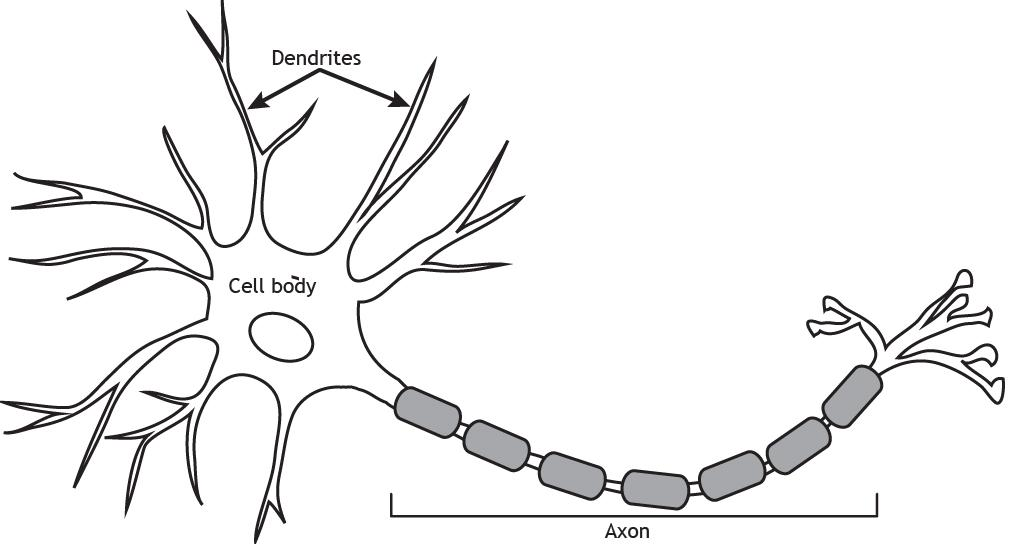

## Perceptron

McCulloch-Pitts model served as a base model for the perceptron algorithm,  the first artificial neural network invented in late 50s by a psychologist Frank Rosenblatt. The Perceptron model became a fundamental
step towards pattern recognition in the field known today as machine learning. 

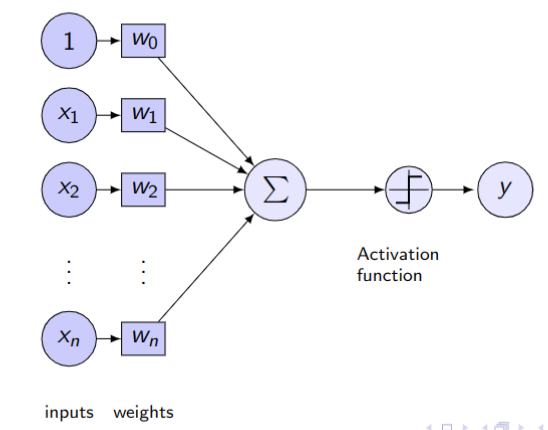

## Perceptron - math description

The perceptron model can be mathematically written as 
$$y = \sigma(w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n) = \sigma \left(w_0 + \sum_{i=1}^n w_ix_i \right),$$
where $\sigma$ is an *activation function* - its value decides if the neuron is activated or not.

The "classic" perceptron is a binary classifier with the following $\sigma$:
$$ (\star) \ \quad
    y  = \sigma \left(w_0 + \sum_{i=1}^n w_ix_i \right) = \begin{cases} 1 & \mbox{if } w_0 + \sum_{i=1}^n w_ix_i \geq 0 \\ 0 & \mbox{ otherwise} \end{cases} 
$$


## Code Example

In [4]:
# without type hints:

def perceptron(
    x_vals,
    weights,
    bias, 
    activation_function
    ):
    y = activation_function(np.dot(x_vals, weights) + bias)
    return y


In [5]:
# with type hints

def perceptron(
    x_vals: npt.ArrayLike,
    weights: npt.ArrayLike,
    bias: float, 
    activation_function: Mapping[float, int] 
    ) -> int:
    y = activation_function(np.dot(x_vals, weights) + bias)
    return y

In [6]:
sigma = lambda x: 1 if x>=0 else 0
bias = 1.0
x_vals = np.array([1.5, -1.7, 2.2])
weights = np.array([0.5, 0.3, 1.2])


print(f"Given x values: {x_vals}, weights: {weights}, bias value {bias} and the binary classifier")
print(f"the output value of the perceptron is {perceptron(x_vals, weights, bias, sigma)}")

Given x values: [ 1.5 -1.7  2.2], weights: [0.5 0.3 1.2], bias value 1.0 and the binary classifier
the output value of the perceptron is 1


### TIME FOR Exercise 1.1 

# Classification and Regression

## CLASSIFICATION 

In Machine Learning (ML) classification categorises a set of data into classes (labels). The output variable must have a discrete value. 

## REGRESSION 

Regression yields the relationship between a set of data (independent variables, features) and a dependent variable (target, outcome). 
The output variable is continuous. 

# Examples

Classifiers:

- Take the perceptron with binary activation function. 
- (LOGISTIC REGRESSION) Take the perceptron with (logistic) sigmoid activation function $\sigma(a) = \frac{1}{1+e^{-a}}$ then classify as $0$ if $\sigma(a) < \frac{1}{2}$ and classify as $1$ if $\sigma(a) > \frac{1}{2}$. For $\sigma(a) = \frac{1}{2}$ you can either pick $0$ or $1$.  

Regressors:

- (LINEAR REGRESSION) Take the perceptron with linear (identity) activation function $\sigma(a) = a$.


## Training and Test Data Sets

So far we have only discussed the definition of some models. The models won't give meaningful predictions/outcomes without being fit to the data. 

We fit our models to the dataset called the **training data**, 
it consists of $n$ samples, and each sample has $m$ features (e.g. height, weight, colour etc).  

The training data comes also with the target (outcome) values for each sample. Fitting the model to the training dataset means minimising the loss function that compares the outputs from our model to the corresponding values from the training dataset.  

After the model is fit, we can evaluate it on the unseen dataset called **test data**. It may happen that we underfit or overfit the model to the training data set and it won't be giving accurate predictions.   



In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz",
    test_split=0.2
    )

65536/57026 [==================================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# X train has 404 samples with 13 features, X test has 102 samples the number of features has to match to the training data. 
max_samp = 5
print(y_train[:max_samp])
# the targets (values in y_train, y_test) are floats typically between 10 and 50 that represent the home prices in k$
# if we want to fit a model to this we wound need a regression model

(404, 13) (404,) (102, 13) (102,)
[15.2 42.3 50.  21.1 17.7]


### TIME FOR Exercise 1.2

# Linear and Non-linear models

Given $n$ features. 

In classification, the model is said to be linear if there is a $n-1$ dimensional hyperplane (e.g. if $n=2$ then this hyperplane is a line) that separates different classes.

In regression, the model is said to be linear if there is a $n-1$ dimensional hyperplane that estimates the outcome (target).  

The above models are either linear or generlised linear (logistic regression). 

The non-linearity of the model is introduced by different activation functions. 

## Why non-linearity? 

Linear models fail to learn the XOR logic. Recall that the XOR operation is defined as
$$\begin{array}{|c|c|c|}
\hline
x_1 & x_2 & x_1 \ \mathrm{XOR} \ x_2 \\ \hline
0 & 0 & 0       \\ \hline
0 & 1 & 1       \\ \hline
1 & 0 & 1       \\ \hline
1 & 1 & 0       \\ \hline
\end{array}$$

The XOR cannot be linearly separable. For the solution see https://ai.stackexchange.com/questions/25228/is-there-a-proof-to-explain-why-xor-cannot-be-linearly-separable

### TIME FOR Exercise 1.3

# Building an artificial brain - Multilayer Perceptron (MLP)
MLPs come with mutiple layers and non-linear activation functions. They can handle the datasets that are not linearly separable (e.g. XOR).

MLP consists of three type of layers

- input layer (nodes represent the input values from predictors/features), 
- hidden layers (set of layers with various number of nodes),
- output layer (represents the output, may not necessarily be one dimensional). 

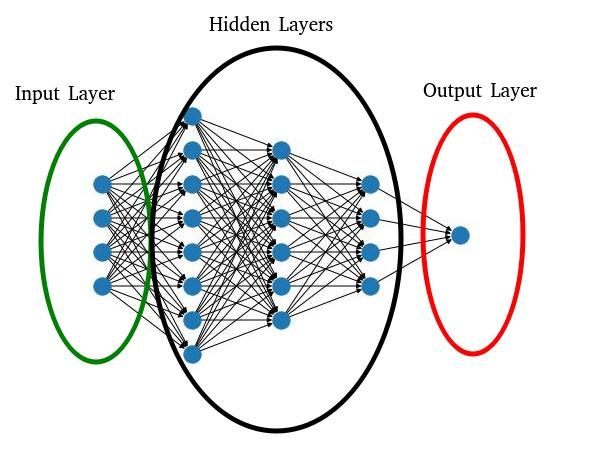

MLP is very often referred to as the fully connected feedforward neural
network. We will now discuss the feeding forward procedure, that is, how
we obtain $y$ from the inputs by traveling forward through the
network.



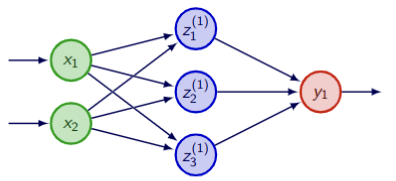

Given the inputs $x_1$ and $x_2$ between the input and hidden layers we have 
- the weights 
$w_{1, 1}^{(1)}, w_{1, 2}^{(1)}, w_{1, 3}^{(1)}, w_{2, 1}^{(1)}, w_{2, 2}^{(1)}, w_{2, 3}^{(1)},$ and 
- biases $w_{0, 1}^{(1)}$, $w_{0, 2}^{(1)}$,  $w_{0, 3}^{(1)}$,
- activation function $\sigma_1$ at the hidden layer. 
 
We find that $$z_k^{(1)} = \sigma_1( w_{0, k}^{(1)} + w_{1,k}^{(1)}x_1 + w_{2,k}^{(1)}x_2)$$

Writing the input in the vector $\vec{x} = (1, x_1, x_2)$ and the weights for the $k$-th node in the hidden layer as 
$\vec{w}_{k}^{{(1)}} = (w_{0, k}^{(1)}, w_{1, k}^{(1)}, w_{2, k}^{(1)})$ the above equation can be written as 
$$z_k^{(1)} = \sigma_1( \vec{w}_{k}^{{(1)}} \cdot \vec{x} ),$$
where $\cdot$ is the dot-product between two vectors. 

Given the output activation function $\sigma_{\mbox{out}}$, the output $y_1$ is calculated as
$$ y_1 = \sigma_{\mbox{out}} \left( w_{0, 1}^{(2)} + w_{1,1}^{(2)}z_1^{(1)} + w_{2,1}^{(2)}z_2^{(1)} + w_{3,1}^{(2)}z_3^{(1)}  \right).$$
Introducing the vector notation $\vec{z}^{(1)} = (1, z_1^{(1)}, z_2^{(1)}, z_3^{(1)})$ and $\vec{w}_{1}^{{(2)}} = (w_{0, 1}^{(1)}, w_{1, 1}^{(1)}, w_{2, 1}^{(1)}, w_{3, 1}^{(1)})$ we can write the above equation as
$$
    y_1 = \sigma_{\mbox{out}} \left(\vec{w}_{1}^{{(2)}} \cdot \vec{z}^{(1)}  \right). 
$$

We can also write the feeding forward procedure in the matrix notation. 

Denote $W^{(1)} = \left[\begin{array}{ccc} w_{1, 1} & w_{1, 2} & w_{1, 3} \\   w_{2, 1} & w_{2, 2} & w_{2, 3}  \end{array} \right]$, $\vec{x} = \left[\begin{array}{c} x_1 \\ x_2 \end{array}\right]$ and $\vec{b}^{(1)} =   \left[\begin{array}{c} w_{0, 1} \\ w_{0, 2} \\ w_{0,3} \end{array}\right]$. 

Then $z^{(1)} =  \left[\begin{array}{c} z_1^{(1)} \\ z_2^{(1)} \\ z_3^{(1)} \end{array}\right]$ can be calcualted as 
$$ z^{(1)} = \sigma_1 \left( \left(W^{(1)}\right)^T\vec{x} + \vec{b}^{(1)} \right).$$

Note that we assumed that $\sigma$ allows matrix input, this is a shorthand-notation that $\sigma$ function to each entry of the resulting vector. 

## Coding Example

In [ ]:
def mlp(
    x_vals: npt.ArrayLike,
    params_layer1: List[npt.ArrayLike],
    params_layer2: List[npt.ArrayLike], 
    sigma_one: Mapping[float, float],
    sigma_out: Mapping[float, float],
    ) -> npt.ArrayLike:
    W1 = params_layer1[0]
    W2 = params_layer2[0]
    b1 = params_layer1[1]
    b2 = params_layer2[1]
    z1 = sigma_one(W1.T@x_vals + b1)
    y = sigma_out(W2.T@z1 + b2)
    return y

Let's take the following input 
- $\vec{x} = [2., -1.]$
- $W^{(1)} = \left[\begin{array}{ccc} 0.2 & 0.3 & 0.46 \\  0.2 & 0.65 & 0.27  \end{array} \right]$, $W^{(2)} = \left[\begin{array}{c}0.27 \\ 0.3 \\ 0.05 \end{array} \right]$
- The hidden actucation functino is ReLu, that is, $\sigma_1(a) = \max\{0, a\}$
- The output activation function is sigmoid. 
- All biases are zero.

In [ ]:
x_vals = np.array([2., -1.])
W1 = np.array([[0.2, 0.3, 0.46], [0.2, 0.65, 0.27]])
W2 = np.array([[0.27], [0.3], [0.05]])
b1 = np.zeros(3)
b2 = np.zeros(1)
params_layer1 = [W1, b1]
params_layer2 = [W2, b2]
sigma_one = lambda a: np.maximum(0, a)
sigma_out = lambda a: 1/(1+np.exp(-a))

In [ ]:
mlp(x_vals, params_layer1, params_layer2, sigma_one, sigma_out)

array([0.52161153])

### TIME FOR Exercise 1.4


## How to implement the network in TensorFlow and Keras

We use sequential (layers added in a sequence) API to implement the network with the same architecture as the one from the example. 

In [ ]:
mlp_model = tf.keras.Sequential(name="SimpleMLP")
mlp_model.add(tf.keras.layers.InputLayer(input_shape=(2), name="input"))
mlp_model.add(tf.keras.layers.Dense(units=3, activation="relu", name="hidden1"))
mlp_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid", name="output"))

In [ ]:
mlp_model.summary()

Model: "SimpleMLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 3)                 9         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


We set the weights to match our example

In [ ]:
parameters =  params_layer1 + params_layer2
mlp_model.set_weights(parameters)

We can recover them from the model:

In [ ]:
mlp_model.get_weights()

[array([[0.2 , 0.3 , 0.46],
        [0.2 , 0.65, 0.27]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.27],
        [0.3 ],
        [0.05]], dtype=float32),
 array([0.], dtype=float32)]

We can produce the network output by performing the feeding forward procedure.


In [ ]:
reshap_input = x_vals.reshape(1, -1)
print(f"Reshaped input has shape:{reshap_input.shape}")
print(f"The output of the network is {mlp_model.predict(reshap_input)}")

Reshaped input has shape:(1, 2)
The output of the network is [[0.5216116]]


### TIME FOR Exercise 1.5

# How to train the network? 

We view neural network's outputs via prediction function:
$$ \widehat{y} = \widehat{y}(\vec{x}, \vec{w}),$$
where 
- $\vec{x}$ is a vector of samples from features/predictors (from the training data set) and 
- $\vec{w}$ is a vector of all network weights and biases.

When the network is initialised it comes with random weights and biases, e.g. drawn uniformly from the interval $[0, 1]$. 

Given any input vector, if we follow the feeding forward procedure we won't get accurate predictions to the given problem. 


### Question
How to make the network to accurately predict the target values in our classification or regression problem given the training data set? 

We need to train it, this means that we need to adjust weights and biases to minimise the prediction error on the training data set. 


## How to measure the prediction error? 

Let $\mathcal{D}$ be a training data set 
$$ \mathcal{D} = \{ (\vec{x}_1, \vec{y}_1),(\vec{x}_2, \vec{y}_2), \ldots, (\vec{x}_n, \vec{y}_n) \},$$
where $\vec{x}_k = (x_{k}(1), x_{k}(2), \ldots, x_k(m))$ and $\vec{y_k} = (y_{k}(1), y_{k}(2), \ldots, y_k(d)) \in \mathbb{R}^d$.

The prediction can be measured as follows:

In REGRESSION via the mean squared error (mse):

$$MSE = \frac{1}{n} \sum_{k=1}^n \| \vec{y}_k - \widehat{y}(\vec{x}_k, \vec{w})\|^2,$$

where $\| \cdot\|$ denotes the Euclidean norm., that is $\|y\|^2 = \sum_{k=1}^d (y(k))^2$

In CLASSIFICATION via the cross entropy loss:

$$ CE  = -\frac{1}{n}\sum_{k=1}^n \sum_{i=1}^d \vec{y}_k(i)\ln(\widehat{y}_k(i)) $$

In CLASSIFICATION we expect the output of the network to be a probability distribution containing the probability for each class. If we have $L$ classes that the output of the network will be $\widehat{y}_k = (p_1, \ldots, p_d)$, 
where $\sum_{k=1}^d p_k = 1$ and $0 \leq p_k \leq 1$.


If the target $y_k = L$ meaning that the k-th element has label $L$, then we convert it to a vector $y_k = (0, \ldots, 0, \underbrace{1}_{L\mbox{-th coordinate}}, 0 \ldots, 0)$

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.square(y_true - y_pred).mean()

In [ ]:
y_true = np.array([[0.4, 0.5,], [0.2, 0.5], [0.4, 0.5]])
y_pred = np.array([[0.35, 0.4], [0.15, 0.2], [0.3, 0.5]])

In [ ]:
print(mean_squared_error(y_true, y_pred))

0.01916666666666667


In [ ]:
def cross_entropy(y_true,y_pred):
  loss = -np.sum(y_true*np.log(y_pred))
  return loss/y_pred.shape[0]

In [ ]:
# We have three labels dog (0), cats (1), chicken (2)
numb_labels = 3
y_true = np.array([0, 1]) # first sample is a dog, second is a chicken
# we convert it to a binary class vector
y_true = tf.keras.utils.to_categorical(y_true, numb_labels)
print(y_true)

[[1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
y_pred = np.array([[0.8, 0.1, 0.1], [0.2, 0.7, 0.1]])

In [ ]:
cross_entropy(y_true, y_pred)

0.2899092476264711

# Training procedure

When we fit the data to the model, we minimise the loss function $E(\vec{w})$ (e.g., mse, cross-entropy depending on the problem). 

Note that the loss function is viewed as the function of weights (and biases). 

The gradient of the loss function $\nabla E$ is the following vector
$$\nabla E = \left( \ldots, \frac{\partial E}{\partial w_{ij}}, \ldots \right) $$

The $- \nabla E$ gives the direction of maximum reduction in $E$.    

We can adjust the weights via Gradient-Descent procedure, that is,  
$$ \vec{w}_{n+1} = \vec{w}_n - \eta\nabla E(\vec{w}_n),$$

where $\eta$ is the learning rate and $\vec{w}_0$ is the initial vector of all weights and biases in the model. 

Calculating the partial derivatives of the loss function with respect to each weight is done via back-propagation method. 

Discussing Gradient Descent type methods and back-propagation method is beyond the scope of this course. 

However, I recommend studying this. For a more mathematical exposition see (https://github.com/gnacikm/FeedforwardNeuralNetwork/blob/master/Notes/ANNintroduction.pdf)

The learning rate parameter determines the speed of convergence, however if it is taken to be too large, then we will be osscilating about the minumum and won't converge to it. 

Below example shows that:

In [ ]:
# Simple gradient descent method
def onedim_grad_descent(dE, w0, n, eta):
    wn = w0
    history = [wn]
    for _ in range(1, n):
        wn = wn - eta*dE(wn)
        history.append(wn)
    return history

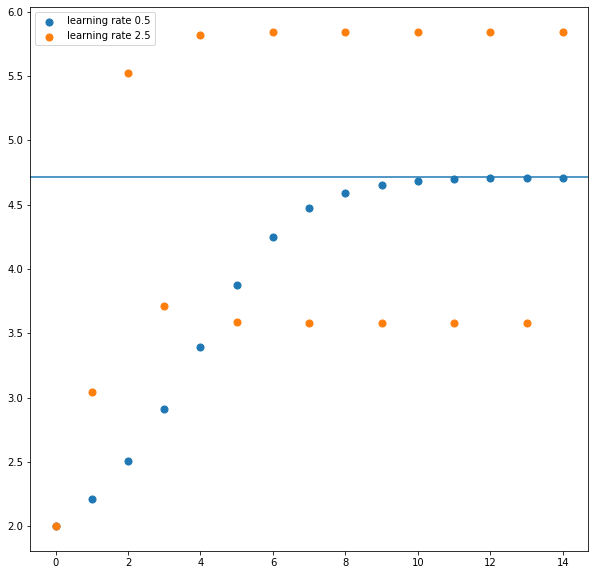

In [ ]:
# loss function 
E = lambda w: np.sin(w)
dE = lambda w: np.cos(w)
w0 = 2.0
n = 15
eta1 = 0.5
eta2 = 2.5

# the minimum of E is at 3pi/2
history1 = onedim_grad_descent(dE, w0, n, eta1)
history2 = onedim_grad_descent(dE, w0, n, eta2)

plt.figure(figsize=(10, 10))
plt.scatter(np.arange(n), history1, label=f"learning rate {eta1}",s=50)
plt.scatter(np.arange(n), history2, label=f"learning rate {eta2}", s=50)
plt.axhline(3*np.pi/2)
plt.legend()
plt.show()

### TIME FOR Exercise 1.6

## Training procedure - Splitting data to Mini-Batches

Given $n$ samples in the training data set. 

We say that we ran $1$ **EPOCH** if we updated all the network weights
$n$ times by using all the data samples. 

Given $$ \mathcal{D} = \{ (\vec{x}_1, \vec{y}_1),(\vec{x}_2, \vec{y}_2), \ldots, (\vec{x}_n, \vec{y}_n) \},$$

and the network output values $(\widehat{y}_1, \ldots, \widehat{y}_n)$.

We can represent the loss function (either mse or cross-entropy) as 

$$ E = \frac{1}{n} \sum_{k=1}^n E_k(\vec{y}_k, \widehat{y}_k),$$
where $E_k(\vec{y}_k, \widehat{y}_k)$ represents the loss for the k-th sample.

Let $w_k$ be an arbitrary weight from the network, updating $w_k$ via gradient descent GD) procedure is 

$$w_k^{\star} = w_k- \frac{\eta}{n} \sum_{i=1}^n \frac{\partial E_i}{\partial w_k}$$

We have performed one **EPOCH** if each weight in the network was adjusted via the above procedure. 

However, it has been proven that the above algorith can suffer from slow convergence. 

To speed up the convergence we use the **mini-batch** stochastic gradient descent (SGD) method. 

This is performed as follows:

- randomly shuffle yout training data set. 
- Divide your data set into mini_batches $B_l$ of size $K$ (assume that $K|N$) then for each $l \in \{1, \ldots, \frac{N}{K}\}$ update the weights as follows

$$w_k^{\star} = w_k- \frac{\eta}{|B_l|} \sum_{i \in B_l}^n \frac{\partial E_i}{\partial w_k}$$

An **EPOCH** is completed when you finish all $\frac{N}{K}$ **iterations**. 

Mini-batch SGD converges match faster than an orginary GD method. 

To speed up the convergence of the gradient descent type methods we split the training data into mini-batches (e.g. of size 2, 4, 8, 16, 32, 64 etc.) Larger the size of the mini-batch is faster the gradient method converges. 

### Caution 1
However, too large batch size can introduce numerical instability. In general, batch size of 32 is a good starting point, and you should also try with 64, 128, and 256 (if possible)

### Caution 2
If your dataset is large, you will need a lot of GPU RAM to handle large batch sizes. 

## EPOCH, ITERATION, MINI-BATCH

If your training dataset is split into $N$ mini-batches, than it takes $N$ iterations of training the network on each mini-batch
to complete $1$ epoch.  

If you don't split your dataset into mini-batches we have just $1$ batch, $N=1$.